# Dependencies

In [1]:
# import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Part 1: Prepare the Data

In [2]:
# load csv into dataframe
file = "myopia.csv"
df = pd.read_csv(file)

In [3]:
# view df
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [4]:
# split dataset
df_unsupervised = df.drop("MYOPIC", axis=1)
df_unsupervised

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
# define X and y variables
X = df_unsupervised
y = df["MYOPIC"]

In [6]:
# view shape for reference
X.shape

(618, 14)

In [7]:
# view shape for reference
y.shape

(618,)

In [8]:
# view shape for reference
df["MYOPIC"].shape

(618,)

In [9]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
# Scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Part 2: Apply Dimensionality Reduction

## Perform PCA

In [11]:
# import PCA
from sklearn.decomposition import PCA

In [12]:
# define componets/explained_variance
pca = PCA(n_components = 0.9)

In [13]:
# fit/tranform model
myopia_pca = pca.fit_transform(X_train_scaled)

In [14]:
# define new dataframe and view
df_unsupervised_myopia = pd.DataFrame(data=myopia_pca)
df_unsupervised_myopia

,0,1,2,3,4,5,6,7,8,9
0,-1.478505,0.022517,1.300457,-1.002016,0.546651,0.761852,0.808871,-1.101183,1.680537,0.959968
1,0.311951,-0.686514,-0.871642,-0.601735,-0.548335,-1.235561,-1.540887,-0.969536,0.247259,-0.668848
2,2.602496,-0.826148,0.623255,-2.089634,-1.560385,1.568911,0.578774,1.483303,-1.111793,1.979830
3,-1.607016,0.221471,0.534094,-0.591255,2.877489,0.891601,2.541509,1.620947,-0.240028,1.418051
4,0.400975,-2.196268,-0.613057,-0.397968,0.533639,-1.546892,-0.088591,0.803232,0.747098,-1.193331
...,...,...,...,...,...,...,...,...,...,...
458,-3.744933,0.171796,0.111612,-0.805780,1.824303,1.383518,0.631273,1.120247,1.671250,-0.062282
459,-1.968225,-0.335761,-1.878119,0.772769,-1.046336,0.559058,0.001044,1.175582,0.208168,-0.797899
460,3.966042,3.385367,-1.032923,-2.734845,-1.449965,-1.057448,-0.392379,0.431461,-1.062668,1.310915
461,-0.214042,-1.339201,-1.353444,-0.165269,-0.252737,0.157769,-1.207156,-1.489546,0.924791,0.408369


Note that the number of columns is taken from 14 to 10 when using a explained variance of 90%.

In [15]:
# view explained variance
pca.explained_variance_ratio_

array([0.20857533, 0.15232599, 0.08828136, 0.08316998, 0.07619264,
       0.07291661, 0.06860286, 0.06580994, 0.05366079, 0.04924817])

In [16]:
# sum explained variance
pca_sum=sum(pca.explained_variance_ratio_)
pca_sum

0.9187836614372358

## Perform TSNE

In [17]:
#import TSNE
from sklearn.manifold import TSNE

In [18]:
# fit TSNE model to PCA dataframe
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_unsupervised_myopia)

/Users/benjohnson/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [19]:
# look at shape
tsne_features.shape

(463, 2)

In [20]:
# define labels if wanting to plot colors.
labels=y_train.values

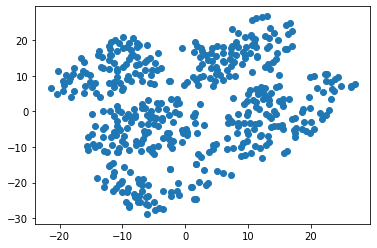

In [21]:
# import plotting abilities and plot TSNE
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

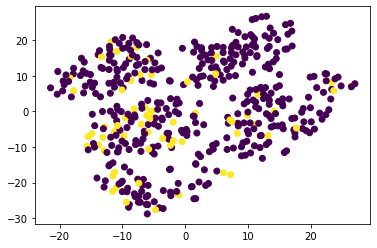

In [22]:
# plot with color now
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

There do not appear to be distinct clusters.

# Part 3: Peform a Cluster Analysis with K-means

In [23]:
# import KMeans
from sklearn.cluster import KMeans

In [24]:
# perform for loop to find elbow
inertia = []
k = list(range(1,11))
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df_unsupervised_myopia)
    inertia.append(km.inertia_)

In [25]:
# create elbow curve by defining elbow data
elbow_data = {"k":k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,5955.555693
1,2,5097.856488
2,3,4541.447250
3,4,4263.355571
4,5,4030.483171


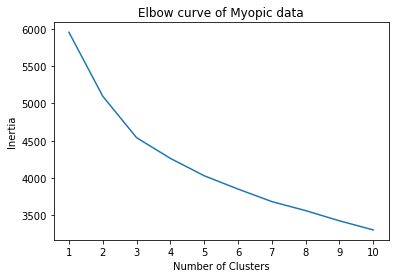

In [26]:
# create elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(1,11)))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve of Myopic data')
plt.show()

It appears the elbow occurs at "3" for the number of clusters. Therefore 3 will be used in the KMeans model below.

In [38]:
# instantiate KMeans model with defined cluster amount of 3
model = KMeans(n_clusters=3, random_state=1)

In [39]:
# fit model to PCA ouutput data and predict clusters
model.fit(df_unsupervised_myopia)
predicted_clusters = model.predict(df_unsupervised_myopia)

/Users/benjohnson/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/benjohnson/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
# Add the predicted class column to the dataframe
df_unsupervised_myopia["class"] = model.labels_

In [41]:
# view df
df_unsupervised_myopia.head()

,0,1,2,3,4,5,6,7,8,9,class
0,-1.478505,0.022517,1.300457,-1.002016,0.546651,0.761852,0.808871,-1.101183,1.680537,0.959968,0
1,0.311951,-0.686514,-0.871642,-0.601735,-0.548335,-1.235561,-1.540887,-0.969536,0.247259,-0.668848,1
2,2.602496,-0.826148,0.623255,-2.089634,-1.560385,1.568911,0.578774,1.483303,-1.111793,1.979830,2
3,-1.607016,0.221471,0.534094,-0.591255,2.877489,0.891601,2.541509,1.620947,-0.240028,1.418051,0
4,0.400975,-2.196268,-0.613057,-0.397968,0.533639,-1.546892,-0.088591,0.803232,0.747098,-1.193331,1


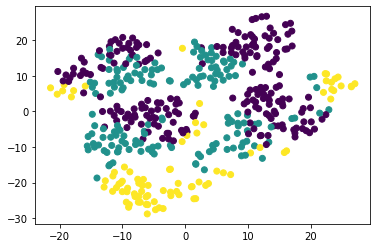

In [42]:
# scatter plot
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=predicted_clusters)
plt.show()

# Part 4: Make a Recommendation

Based on the results

Based on the PCA/TSNE results, it does not seem that the patients can be clustered into two clusters. After performing the K-Means model utilzing the T-SNE components and the predicted clusters, it seems that 3 clusters provides a better result for clustering. It would be my analysis that 3 clusters could be used to separate the patients. 